<a href="https://colab.research.google.com/github/uday1257/AIML-LAB/blob/main/Prediction_of_Absenteeism_of_Employees_in_Courier_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Absenteeism_at_work.csv'
df = pd.read_csv(file_path, delimiter=';')

top_5_reasons = df['Reason for absence'].value_counts().head(5)
print(f"Top 5 reasons for absenteeism:\n{top_5_reasons}")


Top 5 reasons for absenteeism:
Reason for absence
23    149
28    112
27     69
13     55
0      43
Name: count, dtype: int64


In [ ]:
day_with_most_absenteeism = df['Day of the week'].value_counts().idxmax()
print(f"Day with most absenteeism: {day_with_most_absenteeism}")

Day with most absenteeism: 2


In [ ]:
max_age = df['Age'].max()
min_age = df['Age'].min()
print(f"Maximum age of employees: {max_age}")
print(f"Minimum age of employees: {min_age}")

Maximum age of employees: 58
Minimum age of employees: 27


In [ ]:
seasons = {1: 'Summer', 2: 'Autumn', 3: 'Winter', 4: 'Spring'}
season_with_most_absenteeism = df['Seasons'].map(seasons).value_counts().idxmax()
print(f"Season with most absenteeism: {season_with_most_absenteeism}")

Season with most absenteeism: Spring


In [ ]:
highest_education = df['Education'].value_counts().idxmax()
print(f"Highest educational qualification: {highest_education}")

Highest educational qualification: 1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df.fillna(df.median(), inplace=True)

features = df.drop(columns=['Absenteeism time in hours'])
target = df['Absenteeism time in hours']

features = pd.get_dummies(features, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print(f"Classification Model Accuracy: {score:.2f}")

Classification Model Accuracy: 0.45


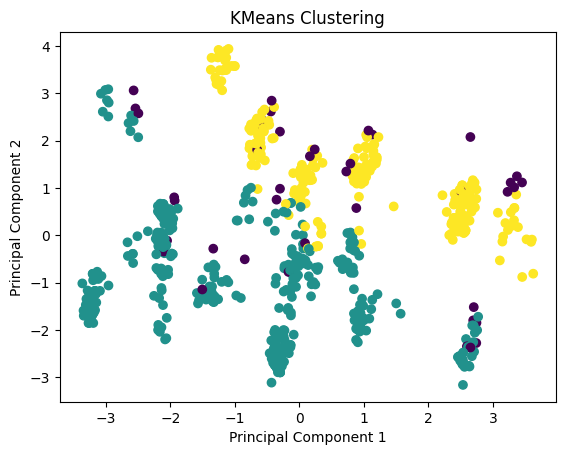

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

clusters = kmeans.predict(scaled_features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title("KMeans Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()